# Musigan 

This notebook describes research and approaches for the `GAN` implementation. The general idea
is to `generate` a `10 sec` wav file using random data. Then `discriminate` using a simple logistic regression 
that will be train on `10 sec` samples of free popular songs on `soundcloud`. The `discriminator` will use the 
features of the audio rather then the raw audio. This way we should have raw audio and not worry about converting 
the audio features back to audio. 







## Generative Adversial Networks
### Resources
1. http://blog.aylien.com/introduction-generative-adversarial-networks-code-tensorflow/
2. https://arxiv.org/abs/1701.00160
3. https://channel9.msdn.com/Events/Neural-Information-Processing-Systems-Conference/Neural-Information-Processing-Systems-Conference-NIPS-2016/Generative-Adversarial-Networks
4. https://github.com/adeshpande3/Generative-Adversarial-Networks/blob/master/Generative%20Adversarial%20Networks%20Tutorial.ipynb

### Repositories 
1. https://github.com/goodfeli/adversarial


### Descriminator

1. https://github.com/aqibsaeed/Urban-Sound-Classification/blob/master/Urban%20Sound%20Classification%20using%20CNN.ipynb


## Feature Extraction - Audio

1. http://yaafe.sourceforge.net
2. http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0144610
3. https://github.com/tyiannak/pyAudioAnalysis

## Generate Audio Samples

1. WAV: https://github.com/sole/snippets/blob/master/audio/generate_noise_test_python/script.py
2. MIDI: https://github.com/smitec/random-midi

## "Good" Music to train Discriminator

1. https://developers.soundcloud.com/docs/api/guide#playing [Find popular music from google]
2. https://labrosa.ee.columbia.edu/millionsong/ (Don't know how the features are extracted)

# Wave Generation

In [3]:
import wave
import random
import struct
import matplotlib.pyplot as plt
%matplotlib inline 

import numpy as np
import wave
import os

# 10 sec samples
SAMPLE_LEN = 44100 * 10 

filename = '../data/processed/rand_sample.wav'

# Delete existing rand_sample.wav file if existing
try:
    os.remove(filename)
except OSError:
    pass

noise_output = wave.open(filename, 'w')
noise_output.setparams((2, 2, 44100, 0, 'NONE', 'not compressed'))


for i in range(0, SAMPLE_LEN):
	value = random.randint(-32767, 32767)
	packed_value = struct.pack('h', value)
	noise_output.writeframes(packed_value)
	noise_output.writeframes(packed_value)

noise_output.close()


In [4]:
from IPython.display import Audio

# load a local WAV file
Audio(filename)  

## Plot Wav file Using MPL


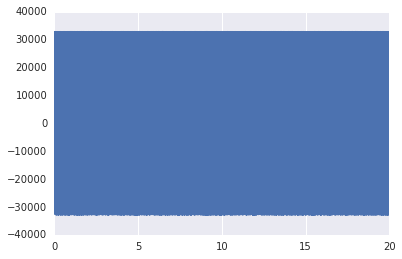

In [35]:

noise_output = wave.open(filename, 'r')
#Extract Raw Audio from Wav File
signal = noise_output.readframes(-1)
signal = np.fromstring(signal, 'Int16')
fs = noise_output.getframerate()

Time=np.linspace(0, len(signal)/fs, num=len(signal))

plt.plot(Time, signal)
    
noise_output.close()


### Plotting using scipy and MPL

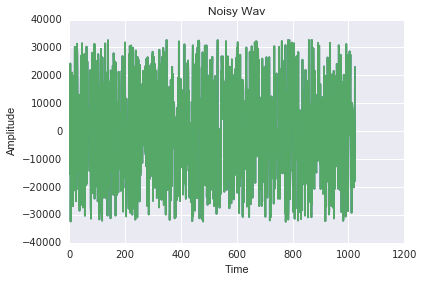

In [36]:
from scipy.io.wavfile import read

# read audio samples
input_data = read(filename)
audio = input_data[1]
# plot the first 1024 samples
plt.plot(audio[0:1024])
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("Noisy Wav")
# display the plot
plt.show()